In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import csv, sqlite3

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [10]:
df = pd.read_csv('flight_data_cleaned_fixed.csv')

In [11]:
print(df)

          price          airline fare_class depart_time depart_date  \
0       2826000  VietnamAirlines    economy     morning   24/6/2024   
1       2189000       VietJetAir    economy     morning   24/6/2024   
2       1648000  VietnamAirlines    economy       night   24/6/2024   
3       1854000       VietJetAir    economy       night   24/6/2024   
4       1875000  VietnamAirlines    economy       night   24/6/2024   
...         ...              ...        ...         ...         ...   
159958  4024000  VietnamAirlines   business     morning   24/8/2024   
159959  4024000  VietnamAirlines   business     morning   24/8/2024   
159960  4024000  VietnamAirlines   business     evening   24/8/2024   
159961  4024000  VietnamAirlines   business       night   24/8/2024   
159962  4348000  VietnamAirlines   business       night   24/8/2024   

       arrival_time arrival_date  src dest  cabin_luggage  hand_luggage  
0           morning    24/6/2024  CXR  HAN             23            12  

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159963 entries, 0 to 159962
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   price          159963 non-null  int64 
 1   airline        159963 non-null  object
 2   fare_class     159963 non-null  object
 3   depart_time    159963 non-null  object
 4   depart_date    159963 non-null  object
 5   arrival_time   159963 non-null  object
 6   arrival_date   159963 non-null  object
 7   src            159963 non-null  object
 8   dest           159963 non-null  object
 9   cabin_luggage  159963 non-null  int64 
 10  hand_luggage   159963 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 13.4+ MB


In [13]:
print(df.describe)

<bound method NDFrame.describe of           price          airline fare_class depart_time depart_date  \
0       2826000  VietnamAirlines    economy     morning   24/6/2024   
1       2189000       VietJetAir    economy     morning   24/6/2024   
2       1648000  VietnamAirlines    economy       night   24/6/2024   
3       1854000       VietJetAir    economy       night   24/6/2024   
4       1875000  VietnamAirlines    economy       night   24/6/2024   
...         ...              ...        ...         ...         ...   
159958  4024000  VietnamAirlines   business     morning   24/8/2024   
159959  4024000  VietnamAirlines   business     morning   24/8/2024   
159960  4024000  VietnamAirlines   business     evening   24/8/2024   
159961  4024000  VietnamAirlines   business       night   24/8/2024   
159962  4348000  VietnamAirlines   business       night   24/8/2024   

       arrival_time arrival_date  src dest  cabin_luggage  hand_luggage  
0           morning    24/6/2024  CXR  

In [14]:
df.isnull().sum()

price            0
airline          0
fare_class       0
depart_time      0
depart_date      0
arrival_time     0
arrival_date     0
src              0
dest             0
cabin_luggage    0
hand_luggage     0
dtype: int64

In [15]:
df.columns

Index(['price', 'airline', 'fare_class', 'depart_time', 'depart_date',
       'arrival_time', 'arrival_date', 'src', 'dest', 'cabin_luggage',
       'hand_luggage'],
      dtype='object')

In [16]:
con = sqlite3.connect('Fly.db')
cur = con.cursor()

In [17]:
%load_ext sql 

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [18]:
%sql sqlite:///Fly.db

In [19]:
df.to_sql('FlyData',con,if_exists = 'replace',index = False)

159963

In [ ]:
SELEC * 
FROM FlyData
WHERE 

In [9]:
df['Price'] = df['price'].astype(int)

In [10]:
df['Depart'] = pd.to_datetime(df['depart_date'], format='%d/%m/%Y')
df['Arrival'] = pd.to_datetime(df['arrival_date'], format='%d/%m/%Y')

df['Date'] = df['Depart'].dt.to_period('W')
df['Month'] = df['Depart'].dt.to_period('M')

weekly_avg = df.groupby('Date')['Price'].mean()
monthly_avg = df.groupby('Month')['Price'].mean()

weekly_avg_vnd = weekly_avg 
monthly_avg_vnd = monthly_avg 


In [11]:
# Set display format to avoid scientific notation
pd.options.display.float_format = '{:,.0f}'.format

# Now display the values in VND
print(weekly_avg_vnd)
print(monthly_avg_vnd)


Date
2024-06-24/2024-06-30   3,254,832
2024-07-01/2024-07-07   3,225,055
2024-07-08/2024-07-14   3,218,318
2024-07-15/2024-07-21   3,223,682
2024-07-22/2024-07-28   3,189,159
2024-07-29/2024-08-04   3,181,113
2024-08-05/2024-08-11   3,150,881
2024-08-12/2024-08-18   3,151,530
2024-08-19/2024-08-25   3,159,180
Freq: W-SUN, Name: Price, dtype: float64
Month
2024-06   3,254,832
2024-07   3,213,127
2024-08   3,154,628
Freq: M, Name: Price, dtype: float64


In [12]:
cheapest_per_route = df.groupby('airline')['Price'].min()

In [13]:
airline_avg = df.groupby('airline')['Price'].mean()

In [14]:
print("Giá vé rẻ nhất theo chặng:")
print(cheapest_per_route)

print("Giá vé trung bình theo hãng hàng không:")
print(airline_avg)


Giá vé rẻ nhất theo chặng:
airline
BambooAirways       907000
VietJetAir          645000
VietnamAirlines    1087000
Name: Price, dtype: int32
Giá vé trung bình theo hãng hàng không:
airline
BambooAirways     3,303,187
VietJetAir        2,624,542
VietnamAirlines   3,307,974
Name: Price, dtype: float64


In [15]:
air_name = 'VietJetAir'
air_data = df[df['airline'] == air_name]
air_data['Depart'] = pd.to_datetime(air_data['depart_date'], format='%d/%m/%Y')
air_data['Arrival'] = pd.to_datetime(air_data['arrival_date'], format='%d/%m/%Y')

air_data['Date'] = air_data['Depart'].dt.to_period('W')
df['Month'] = df['Depart'].dt.to_period('M')

weekly_avg = df.groupby('Date')['Price'].mean()
monthly_avg = df.groupby('Month')['Price'].mean()

weekly_avg_vnd = weekly_avg 
monthly_avg_vnd = monthly_avg 



C:\Users\Dell\AppData\Local\Temp\ipykernel_10480\4167622182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_data['Depart'] = pd.to_datetime(air_data['depart_date'], format='%d/%m/%Y')
C:\Users\Dell\AppData\Local\Temp\ipykernel_10480\4167622182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_data['Arrival'] = pd.to_datetime(air_data['arrival_date'], format='%d/%m/%Y')
C:\Users\Dell\AppData\Local\Temp\ipykernel_10480\4167622182.py:6: SettingWithCopyWarning: 
A value is trying to be set on a co

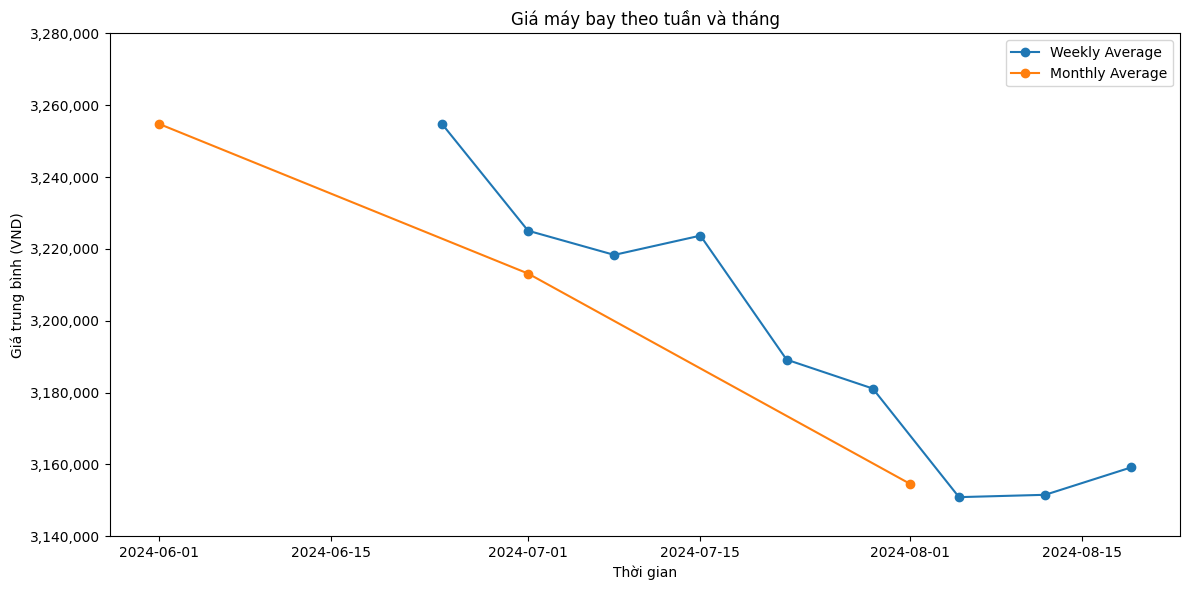

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
plt.plot(weekly_avg.index.astype('datetime64[ns]'), weekly_avg.values, label='Weekly Average', marker='o')
plt.plot(monthly_avg.index.astype('datetime64[ns]'), monthly_avg.values, label='Monthly Average', marker='o')

plt.title('Giá máy bay theo tuần và tháng')
plt.xlabel('Thời gian')
plt.ylabel('Giá trung bình (VND)')
# Đặt định dạng cho trục y và x
yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{int(tick):,.0f}' for tick in yticks])
plt.xticks(rotation=0)

plt.legend()
plt.tight_layout()
plt.show()



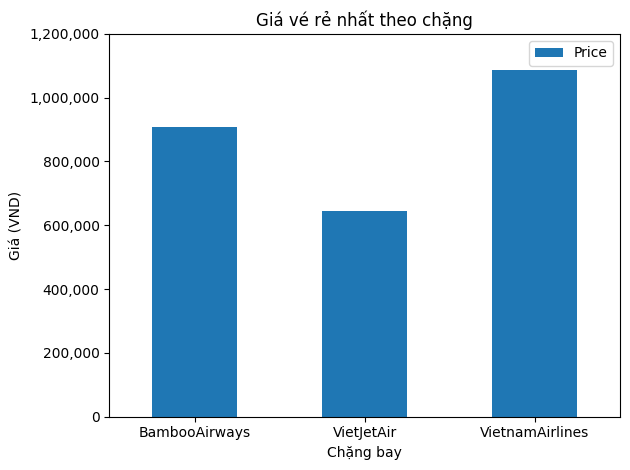

In [17]:
cheapest_per_route.plot(kind='bar', title='Giá vé rẻ nhất theo chặng', ylabel='Giá (VND)', xlabel='Chặng bay')
yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{int(tick):,.0f}' for tick in yticks])
plt.xticks(rotation=0)

plt.legend()
plt.tight_layout()
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df['Date_Numeric'] = df['Date'].dt.strftime('%Y%U').astype(int)

# Chọn biến cho mô hình hồi quy
X = df[['Date_Numeric']]
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Mô hình hồi quy
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán giá vé trong tương lai
future_weeks = pd.DataFrame({'Date_Numeric': range(df['Date_Numeric'].max(), df['Date_Numeric'].max() + 10)})
predictions = model.predict(future_weeks)
print(predictions)


[3137159.05547285 3123412.00145721 3109664.94744205 3095917.8934269
 3082170.83941126 3068423.7853961  3054676.73138094 3040929.6773653
 3027182.62335014 3013435.56933498]


In [19]:
df['Week_Numeric'] = df['Date'].dt.strftime('%Y%U').astype(int)

# Chọn biến cho mô hình hồi quy
X = df[['Week_Numeric']]
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mô hình hồi quy
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán giá vé trong tương lai
future_weeks = pd.DataFrame({'Week_Numeric': range(df['Week_Numeric'].max(), df['Week_Numeric'].max() + 10)})
predictions = model.predict(future_weeks)
print(predictions)

[3145407.01182175 3132638.07951212 3119869.14720249 3107100.21489286
 3094331.28258324 3081562.35027361 3068793.41796398 3056024.48565435
 3043255.55334473 3030486.62103462]


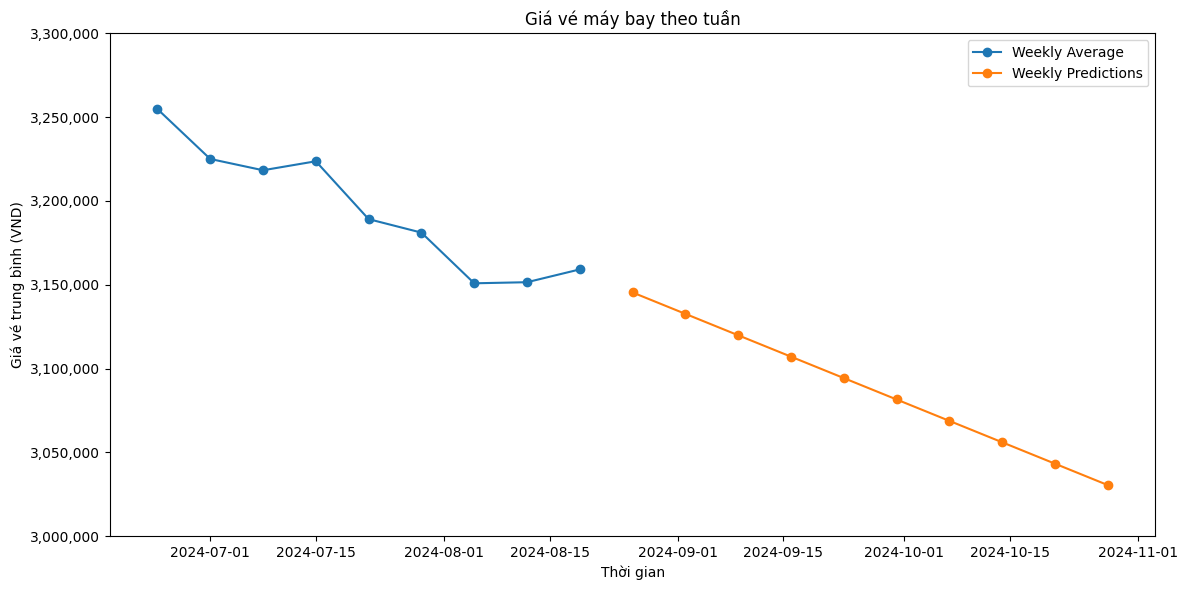

In [20]:
def convert_to_date(week_numeric):
    year = week_numeric // 100  # Lấy phần năm
    week = week_numeric % 100    # Lấy phần tuần
    # Tạo ngày đầu tiên của tuần
    return pd.to_datetime(f'{year}-W{week}-1', format='%Y-W%U-%w')

# Vẽ biểu đồ giá vé theo dự đoán giá tương lai theo tuần
plt.figure(figsize=(12, 6))
plt.plot(weekly_avg.index.astype('datetime64[ns]'), weekly_avg.values, label='Weekly Average', marker='o')
plt.plot(future_weeks['Week_Numeric'].apply(convert_to_date), predictions, label='Weekly Predictions', marker='o')

plt.title('Giá vé máy bay theo tuần')
plt.xlabel('Thời gian')
plt.ylabel('Giá vé trung bình (VND)')
plt.legend()

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{int(tick):,.0f}' for tick in yticks])

plt.tight_layout();